#Import important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

#Load the Dataset

In [2]:
data = pd.read_csv('/content/apple_quality.csv')
df = pd.DataFrame(data)

#Exploratry Data Analysis(EDA)(Part 1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [ ]:
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [ ]:
df.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [ ]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [ ]:
df.tail()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


#Preprocessing Steps(Part 1)

In [4]:
#Drop the row ehich contain the nan value
df = df.dropna()

In [5]:
#Drop the Feature not required
df = df.drop('A_id',axis=1)

In [6]:
#Convert value of acidity featyre into float
df['Acidity'] = df['Acidity'].astype(float)

In [7]:
#Label Encoding
le=LabelEncoder()
df['Quality'] = le.fit_transform(df['Quality'])

#Exploratry Data Analysis(EDA)(Part 2)

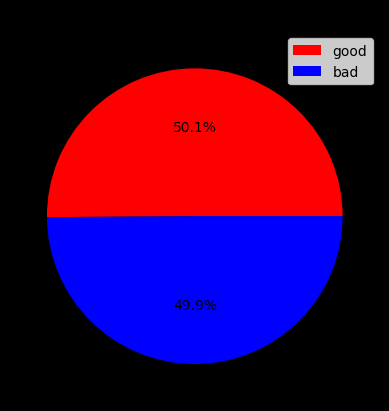

In [8]:
#Pi-plot of target var of unique classes
plt.figure(facecolor='black')
plt.pie(df['Quality'].value_counts(), labels=['good', 'bad'], autopct='%1.1f%%', colors=['red', 'blue'])
plt.legend()
plt.title('Quality')
plt.show()


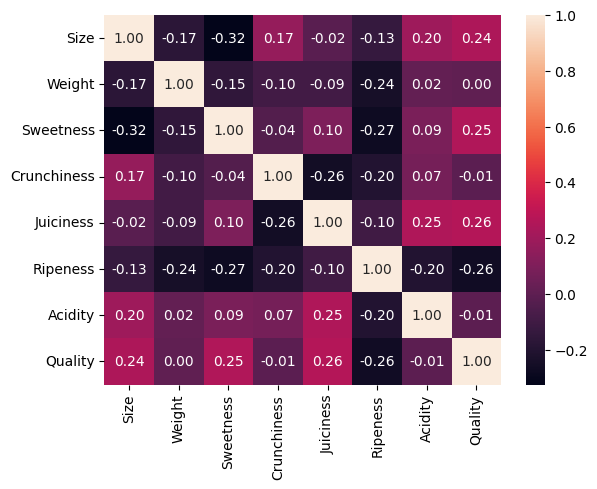

In [ ]:
#Cor-relation matrix
sns.heatmap(df.corr(),annot=True,fmt =".2f")
plt.show()

#Preprocessing Steps(Part 2)

<ipython-input-16-0b0791ece25b>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


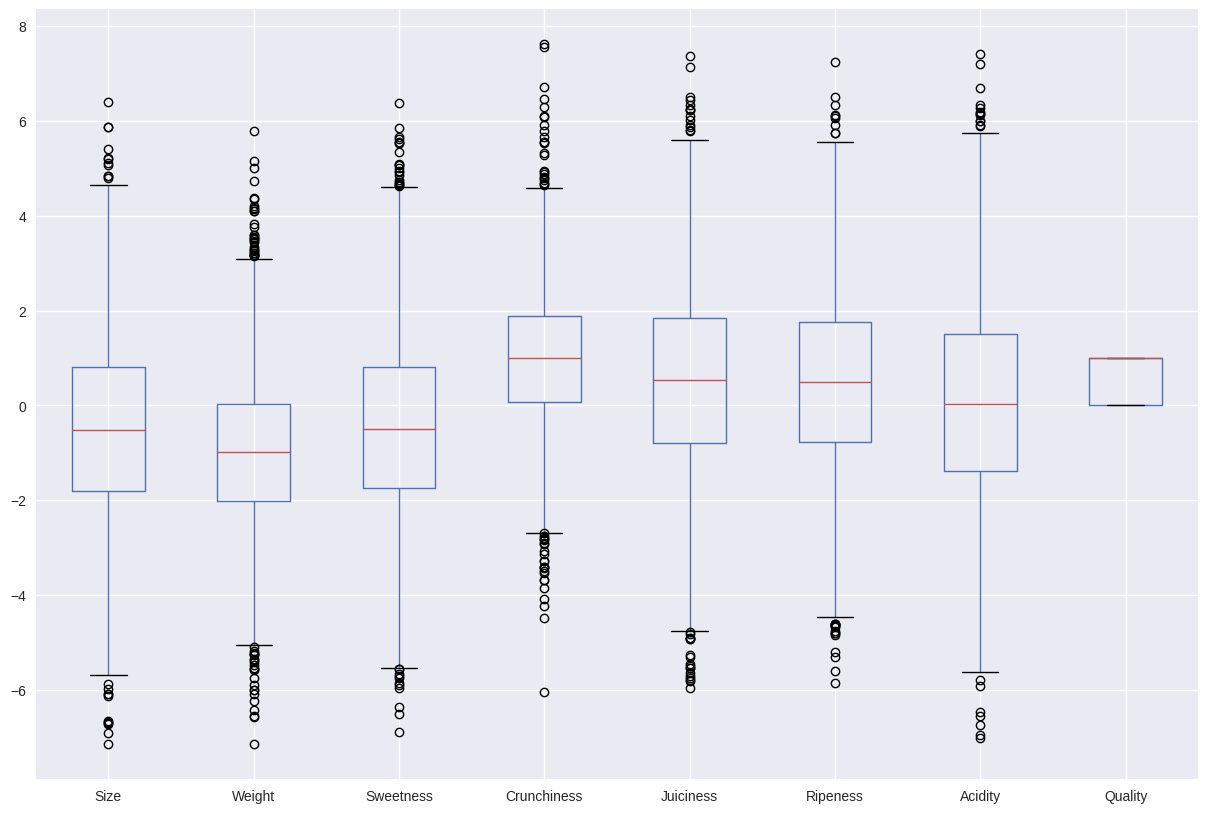

In [ ]:
#Outlier
plt.style.use('seaborn')
df.boxplot(figsize=(15,10))
plt.show()

In [9]:
#Remove outlier
cols = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness','Acidity']

for column in cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Update values using IQR capping
    df[column] = np.where(df[column] < lower_bound, lower_bound,
                               np.where(df[column] > upper_bound, upper_bound,
                                        df[column]))

<ipython-input-18-b6b04faf6810>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


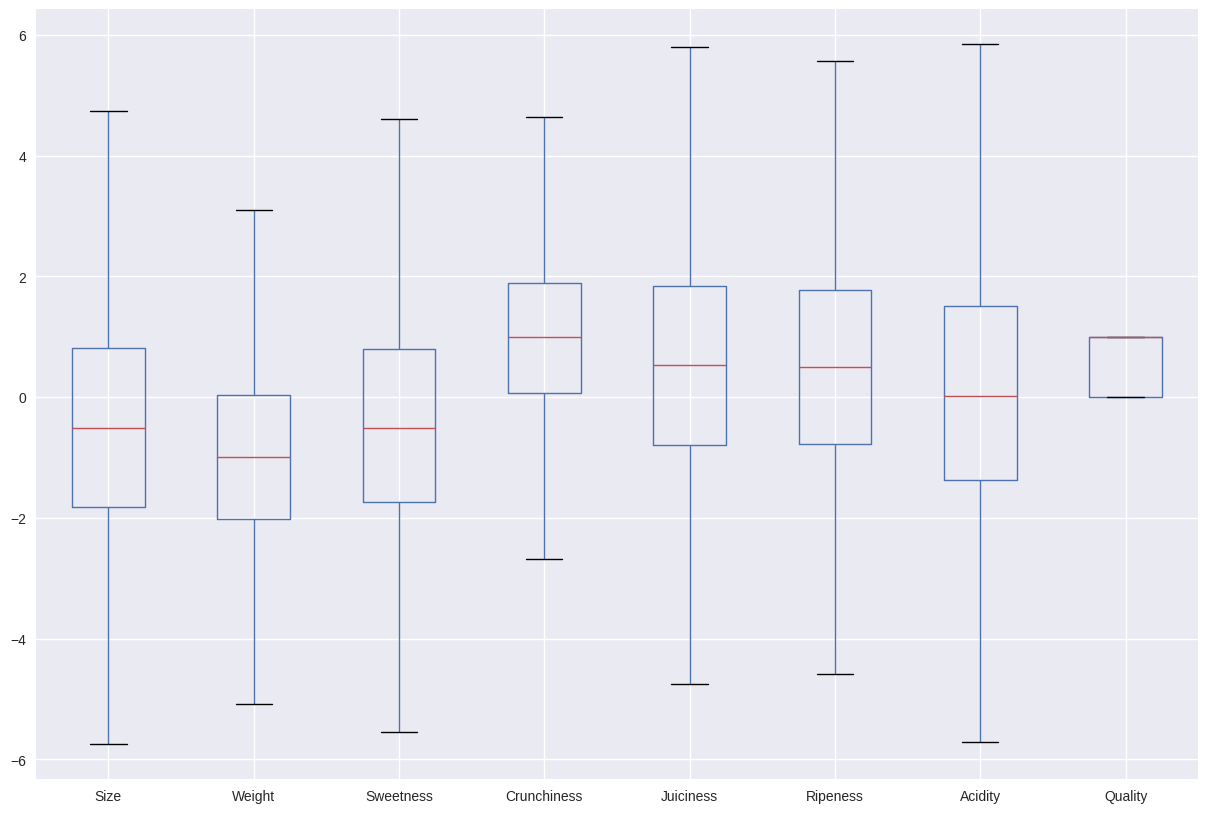

In [ ]:
#Plot after remove outliner
plt.style.use('seaborn')
df.boxplot(figsize=(15,10))
plt.show()

In [10]:
#Divide into target and variable
x = df.drop('Quality',axis=1)
y = df['Quality']

In [ ]:
#Pair plot
sns.pairplot(x)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [12]:
#Divide into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)


In [13]:
print(x_train.shape)
print(x_test.shape)
print("Y train value counts:")
print(y_train.value_counts())
print('----------------')
print("Y test value counts:")
print(y_test.value_counts())
print('----------------')

(2800, 7)
(2800,)
(1200, 7)
Y train value counts:
Quality
1    1409
0    1391
Name: count, dtype: int64
----------------
Y test value counts:
Quality
0    605
1    595
Name: count, dtype: int64
----------------


#Modelling and Evaluting

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(x_train,y_train)
train_result = lr.predict(x_train)
test_result = lr.predict(x_test)
from sklearn.metrics import accuracy_score as ac
accuracy_score_train_lr = ac(y_train,train_result)
accuracy_score_test_lr = ac(y_test,test_result)
print("Training Accuracy: ", accuracy_score_train_lr)
print("Test Accuracy: ", accuracy_score_test_lr)
rf_f1_score_lr = f1_score(y_test, test_result)
print("f1 Score of Random Forest is : ",rf_f1_score_lr)

Training Accuracy:  0.7432142857142857
Test Accuracy:  0.7516666666666667
f1 Score of Random Forest is :  0.7537190082644628


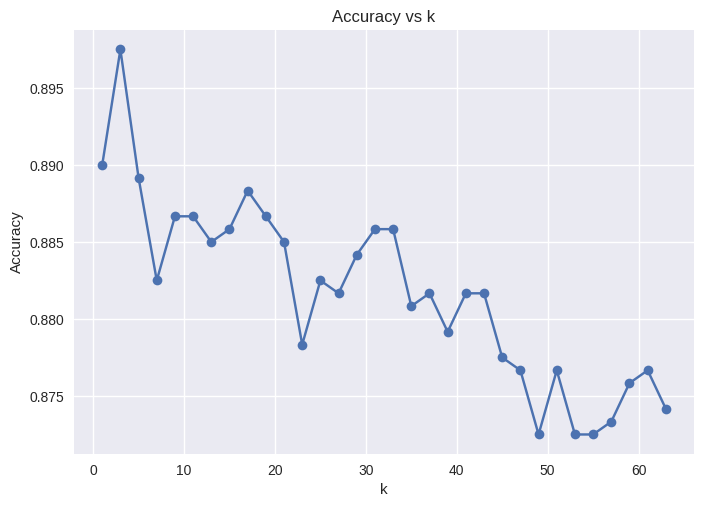

Best k: 3


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

test_k = [i for i in range(1, 64, 2)]
train_acc = []

for k in test_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    train_acc.append(accuracy_score(y_test, y_pred))

plt.plot(test_k, train_acc, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()

best_validation_k = test_k[train_acc.index(max(train_acc))]
print(f'Best k: {best_validation_k}')

In [ ]:
#K-Nearest-Neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
train_result = knn.predict(x_train)
test_result = knn.predict(x_test)
from sklearn.metrics import accuracy_score as sc
accuracy_score_train_knn = ac(y_train,train_result)
accuracy_score_test_knn = ac(y_test,test_result)
print("Training Accuracy: ", accuracy_score_train_knn)
print("Test Accuracy: ", accuracy_score_test_knn)
rf_f1_score_knn = f1_score(y_test, test_result)
print("f1 Score of Random Forest is : ",rf_f1_score_knn)

Training Accuracy:  0.9457142857142857
Test Accuracy:  0.8975
f1 Score of Random Forest is :  0.8962025316455695


In [ ]:
#Single Vector Classifier
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
train_result = svc.predict(x_train)
test_result = svc.predict(x_test)
from sklearn.metrics import accuracy_score as ac
accuracy_score_train_svc = ac(y_train,train_result)
accuracy_score_test_svc = ac(y_test,test_result)
print("Training Accuracy: ", accuracy_score_train_svc)
print("Test Accuracy: ", accuracy_score_test_svc)
rf_f1_score_svc = f1_score(y_test, test_result)
print("f1 Score of Random Forest is : ",rf_f1_score_svc)

Training Accuracy:  0.8971428571428571
Test Accuracy:  0.8891666666666667
f1 Score of Random Forest is :  0.8885163453478625


In [ ]:
#Random Forests
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=9, min_samples_split=6, random_state=42)
rf.fit(x_train, y_train)
train_result = rf.predict(x_train)
test_result = rf.predict(x_test)
from sklearn.metrics import accuracy_score as ac
accuracy_score_train_rn = ac(y_train,train_result)
accuracy_score_test_rn = ac(y_test,test_result)
print("Training Accuracy: ", accuracy_score_train_rn)
print("Test Accuracy: ", accuracy_score_test_rn)
rf_f1_score_rn = f1_score(y_test, test_result)
print("f1 Score of Random Forest is : ",rf_f1_score_rn)

Training Accuracy:  0.9510714285714286
Test Accuracy:  0.8766666666666667
f1 Score of Random Forest is :  0.8786885245901639


#Hyperparameter Tuning

In [ ]:
#KNN
from sklearn.model_selection import GridSearchCV
arr = np.arange(1,100,2)
param_grid = {"n_neighbors":arr,"weights":["uniform","distance"],"metric":["euclidean","manhattan"]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn,param_grid,cv = 5,scoring = "accuracy")
grid_search.fit(x_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
best_knn = grid_search.best_estimator_
test_accuracy_knn = best_knn.score(x_test, y_test)
print("Test Accuracy:", test_accuracy_knn)

Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
Test Accuracy: 0.8875


In [ ]:
#SVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
para_grid = {'C':[0.1, 1, 10,15],"kernel":['linear', 'rbf', 'poly'],'gamma': ['auto', 'scale']}
svc = SVC()
grid_search = GridSearchCV(svc,para_grid,cv = 5,scoring='accuracy')
grid_search.fit(x_train,y_train)

print("Best hyperparameters : ",grid_search.best_params_)
best_svc = grid_search.best_estimator_
test_accuracy_svc = best_svc.score(x_test, y_test)
print("Test Accuracy:", test_accuracy_svc)

Best hyperparameters :  {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Test Accuracy: 0.9125


In [ ]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [6, 8,10,20],  # Maximum depth of individual trees
    'min_samples_split': [4, 6, 8],  # Minimum samples required to split a node
    'min_samples_leaf': [2, 4],   # Minimum samples required at each leaf node
}

rfc = RandomForestClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=10, scoring='accuracy')

grid_search.fit(x_train, y_train)
best_rfc = grid_search.best_estimator_
test_accuracy_rfc = best_rfc.score(x_test, y_test)
print("Best Parameters:", grid_search.best_params_)
print("Test Accuracy:", test_accuracy_rfc)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 100}
Test Accuracy: 0.88


#Analysis Graph

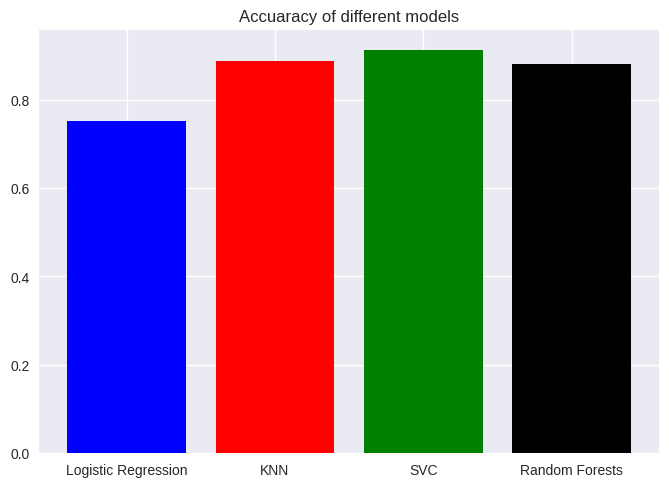

In [ ]:
#Code for accuaracy
scores = [accuracy_score_test_lr,test_accuracy_knn,test_accuracy_svc,test_accuracy_rfc]
models = ['Logistic Regression','KNN','SVC','Random Forests']
c = ['blue','red','green','black']
plt.title('Accuaracy of different models')
plt.bar(models,scores,color=c)
plt.show()

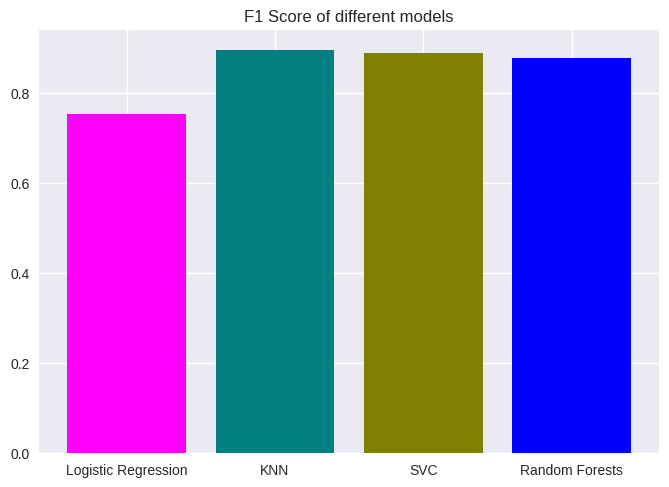

In [ ]:
#f1 score
f1_score = [rf_f1_score_lr,rf_f1_score_knn,rf_f1_score_svc,rf_f1_score_rn]
c = ['Magenta','Teal','Olive','blue']
plt.title('F1 Score of different models')
plt.bar(models,f1_score,color=c)
plt.show()